In [2]:
cd ..

/Users/odatakuma/cmu/FleetAI


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import cPickle as pickle
import time
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from experiment import describe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def plot(df):
    plt.figure(figsize=(10, 6))
    index = (df.minofday+df.dayofweek*1440) / 60
    plt.subplot(211)
    plt.ylabel('count')
    plt.plot(index, df.requests/10, label='demand/10')
    plt.plot(index, df.reject, label='reject')
    plt.plot(index, df.resource/10, label='resource/10')
    plt.legend()
    plt.subplot(212)
    plt.ylabel('wait/idle time')
    plt.plot(index, df.wait_time/(df.requests-df.reject), label='wait')
    plt.plot(index, df.idle_trip/8000, label='idle')
    plt.legend()
    return plt

In [9]:
df = pd.read_csv("data/results/score0.csv")

In [16]:
describe(df)

----------------------------------- SUMMARY -----------------------------------
REQUESTS: 387557 / REJECTS: 30844 / IDLE: 0 / REWARD: 761
WAIT TIME: 3.77 / REJECT RATE: 0.080 / EFFORT: 0.00 / TIME: 0.00


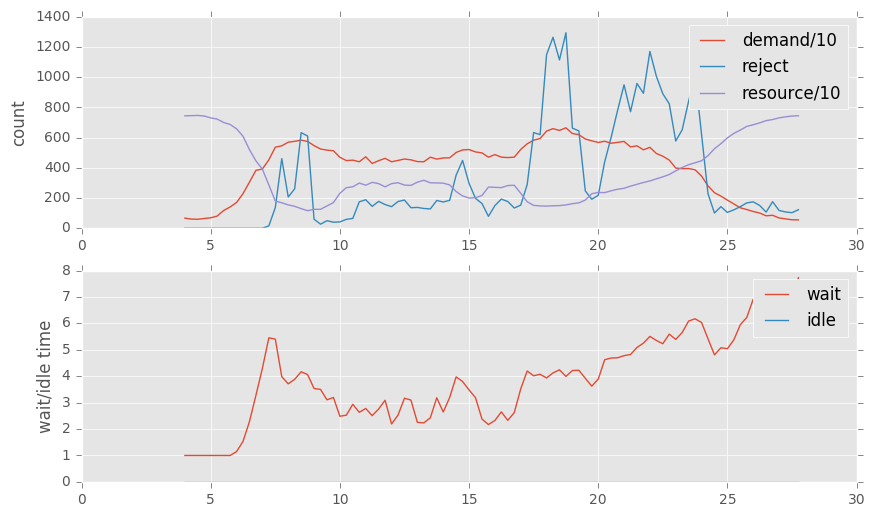

In [15]:
plot(df);

In [49]:
import os
score_dir = "data/results/lp_score/"
filenames = os.listdir(score_dir)

df = pd.read_csv(score_dir + filenames[0])
for f in filenames[1:]:
    df = df.append(pd.read_csv(score_dir + f))
df = df.sort_values(['dayofweek', 'minofday'])

In [54]:
df[df.dayofweek==4]

,Unnamed: 0,dayofweek,minofday,requests,wait_time,reject,idle_trip,resource,dispatch,reward,agent_time
21,21,4,0,5738,28468.234576,515,5038.971874,694,494,10.721461,26.412033
22,22,4,15,5531,0.000000,0,9791.220955,797,578,-1.223903,26.399612
0,0,4,1305,6263,14458.785205,175,4631.618598,2173,604,39.549011,26.439078
1,1,4,1320,6428,16127.554851,202,5620.139544,1769,595,12.238835,26.058410
2,2,4,1335,6289,23332.910840,191,6750.547551,1672,694,12.537712,26.304101
3,3,4,1350,6419,30600.451658,429,4990.161259,1302,548,12.581827,26.801549
4,4,4,1365,6714,26084.618968,653,3079.902866,723,328,12.436054,26.192947
5,5,4,1380,6608,25692.895929,663,3450.239367,574,326,12.699564,26.099628
6,6,4,1395,6669,27379.975556,786,3869.525674,597,347,12.862356,26.322733
7,7,4,1410,6770,24964.247211,665,4705.577888,643,401,11.972531,26.482179


In [50]:
describe(df[df.dayofweek<4])
describe(df[df.dayofweek>=4])

----------------------------------- SUMMARY -----------------------------------
REQUESTS: 1528340 / REJECTS: 47407 / IDLE: 1525138 / REWARD: 3767
WAIT TIME: 2.81 / REJECT RATE: 0.031 / EFFORT: 5.91 / TIME: 26.21
----------------------------------- SUMMARY -----------------------------------
REQUESTS: 797160 / REJECTS: 21985 / IDLE: 1028795 / REWARD: 1736
WAIT TIME: 2.76 / REJECT RATE: 0.028 / EFFORT: 7.49 / TIME: 26.12


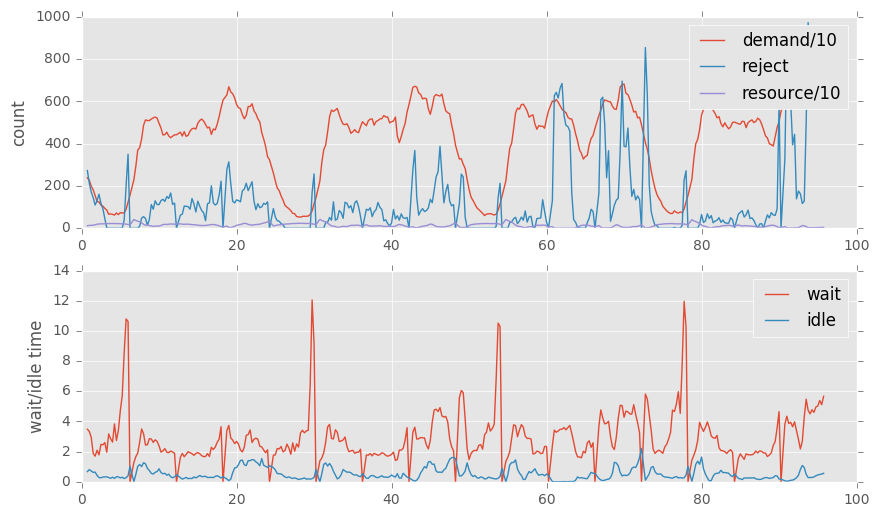

In [51]:
plot(df[df.dayofweek<4]);

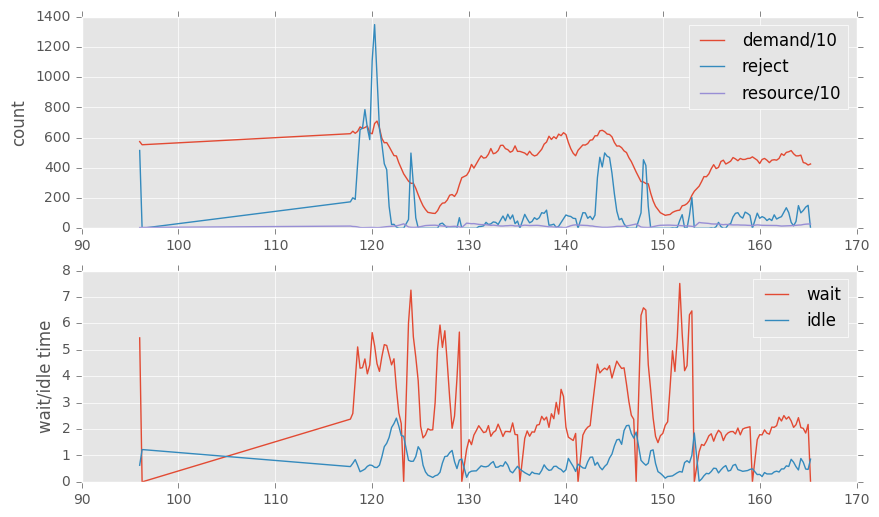

In [52]:
plot(df[df.dayofweek>=4]);

In [48]:
score_dir = "data/results/without_score/"
filenames = os.listdir(score_dir)
df = pd.read_csv(score_dir + filenames[0])
for f in filenames[1:]:
    df = df.append(pd.read_csv(score_dir + f))
df = df.sort_values(['dayofweek', 'minofday'])
describe(df)

----------------------------------- SUMMARY -----------------------------------
REQUESTS: 2325500 / REJECTS: 168999 / IDLE: 0 / REWARD: 5553
WAIT TIME: 3.43 / REJECT RATE: 0.073 / EFFORT: 0.00 / TIME: 0.00


In [ ]:
plot(df);